In [75]:
%pip install pflacco
%pip install cma
%pip install ioh


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Users\natal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Users\natal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: C:\Users\natal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ioh import ProblemClass, get_problem
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


from pflacco.sampling import create_initial_sample

from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
from pflacco.local_optima_network_features import compute_local_optima_network, calculate_lon_features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
gnbr_data_df = pd.read_csv("ela_results_gnbg.csv")

In [78]:
gnbr_data_df.head()

,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,ela_distr.costs_runtime,fitness_distance.fd_correlation,fitness_distance.fd_cov,fitness_distance.distance_mean,fitness_distance.distance_std,fitness_distance.fitness_mean,fitness_distance.fitness_std,...,disp.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,Function,Instance,Dimension
0,0.145623,-1.146398,1,0.016,0.642889,0.040001,0.179464,0.140830,6.050841,0.441815,...,0.0,0.788658,1.206206,8.05204,0.945946,0.295918,0.063,F1,1,2
1,0.166068,-1.158153,1,0.000,0.562485,0.028102,0.136558,0.101271,6.011021,0.493340,...,0.0,0.698087,1.246246,8.05204,0.905906,0.346939,0.172,F1,1,2
2,0.166068,-1.158153,1,0.016,0.562485,0.028102,0.136558,0.101271,6.011021,0.493340,...,0.0,0.698087,1.246246,8.05204,0.905906,0.346939,0.094,F1,1,2
3,0.166068,-1.158153,1,0.000,0.562485,0.028102,0.136558,0.101271,6.011021,0.493340,...,0.0,0.698087,1.246246,8.05204,0.905906,0.346939,0.110,F1,1,2
4,0.166068,-1.158153,1,0.000,0.562485,0.028102,0.136558,0.101271,6.011021,0.493340,...,0.0,0.698087,1.246246,8.05204,0.905906,0.346939,0.109,F1,1,2


In [79]:
bbob_data_df = pd.read_csv("ela_final_results.csv")

In [80]:
bbob_data_df.head()

,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,ela_distr.costs_runtime,fitness_distance.fd_correlation,fitness_distance.fd_cov,fitness_distance.distance_mean,fitness_distance.distance_std,fitness_distance.fitness_mean,fitness_distance.fitness_std,...,disp.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,Function,Instance,Dimension
0,0.308304,-0.857005,2,0.016,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.015,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2
1,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.094,F1,1,2
2,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
3,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
4,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2


In [81]:
columns = gnbr_data_df.columns.to_list()[:-3]

## Comparision

In [82]:

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = columns
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = bbob_data_df.melt(id_vars='Function', value_vars=selected_features_2, ## TODO change features
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = gnbr_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')


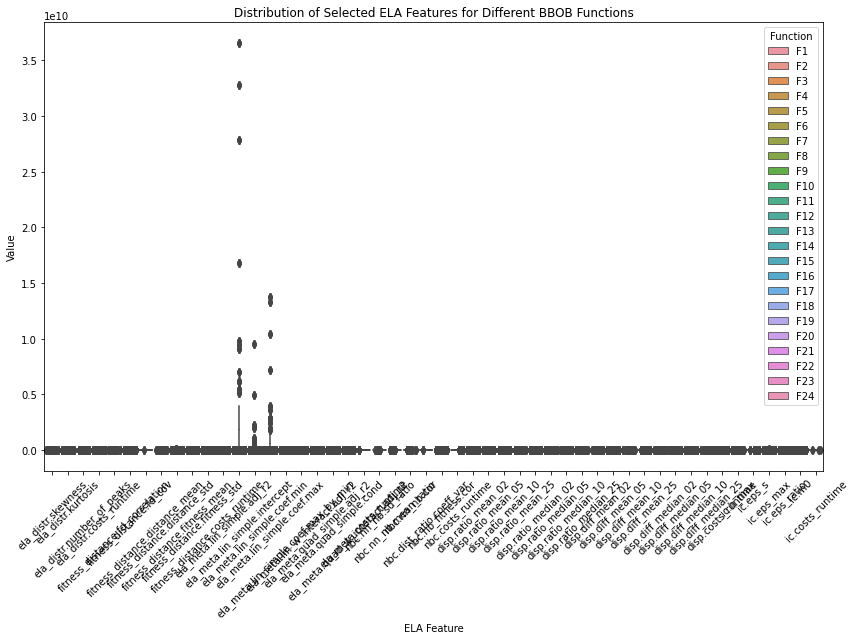

In [83]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_1, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

C:\Users\natal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4575: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\natal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\natal\AppData\Local\Temp\ipykernel_22712\2085931695.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\natal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes

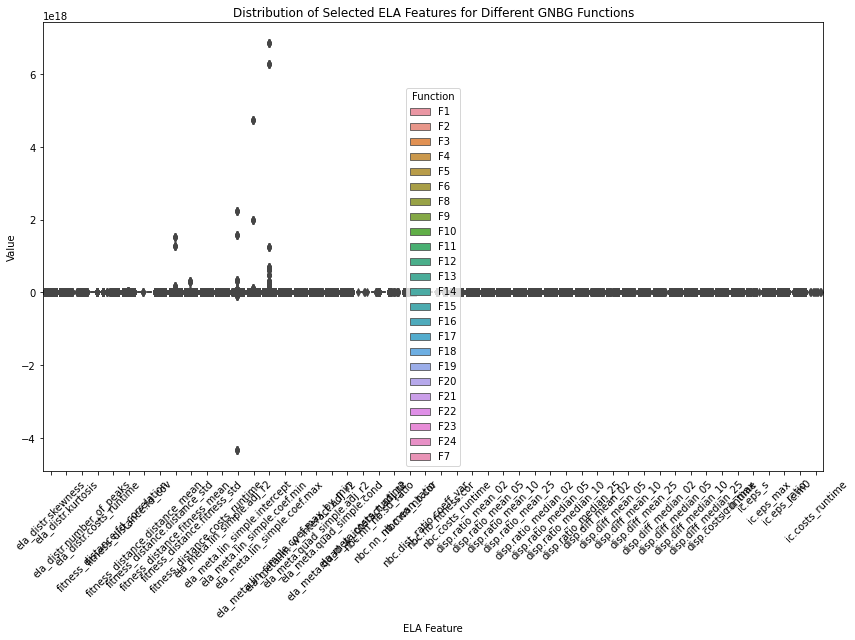

In [84]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_2, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different GNBG Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

Clusters from bbob to gnbr based on modality, ill-conditioning, symmetry, separability, deceptiveness. Due to the computation problem we don't have F7 function from GNBG. We shrink some of classes in GNBG - modality is unimodal/multimodal and separabiliy is only separable/non-separable no partially separable.

| Cluster         | BBOB   | GNBG   |
|-----------------|--------|--------|
| **1st cluster** | f15    | f16    |
|                 | f17    | f18    |
|                 | f19    | f19    |
|                 | f20    | f20    |
|                 | f21    | f21    |
|                 | f23    | f22    |
|                 | f24    | f23    |
|                 | f16    |        |
| **2nd**         | f18    | f17    |
|                 | f22    | f24    |
| **3rd**         | f1     | f1     |
|                 |        | f2     |
| **4th**         | f2     | f3     |
|                 | f5     |        |
| **5th**         | f10    | f14    |
|                 | f11    | f5     |
|                 | f12    | f6     |
|                 | f13    | f11    |
|                 | f14    | f12    |
|                          | f6     |        |
|                 | f7     |        |
| **6th**         | f3     | **f7**     |
|                 |        | f8     |
| **7th**         | f4     | f9     |
|                 |        | f10    |
| **8th**         | f9     | f4     |
|                 | f8     |        |


In [85]:
# check features from same cluster 2nd
ela_filtered_bbob = ela_melted_1[(ela_melted_1['Function'] == 'F18') | (ela_melted_1['Function'] == 'F22')] ## BBOB

ela_filtered_gnbg = ela_melted_2[(ela_melted_2['Function'] == 'F17') | (ela_melted_2['Function'] == 'F24')] ## GNGG


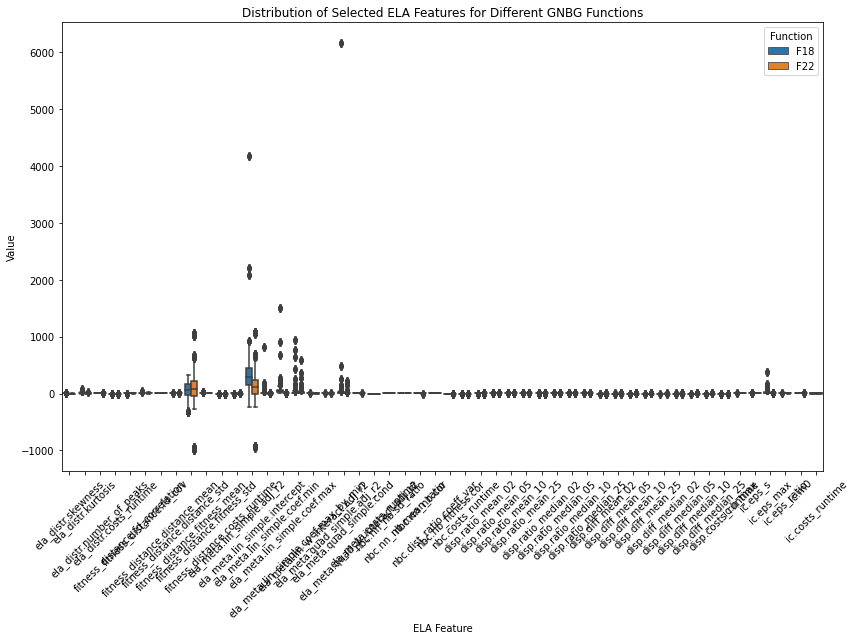

In [86]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_filtered_bbob, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different GNBG Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

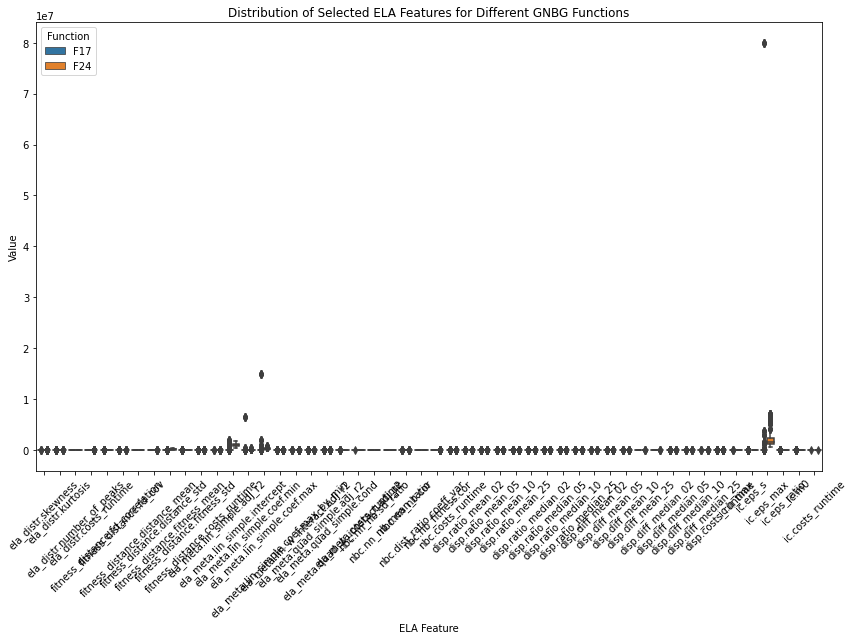

In [87]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_filtered_gnbg, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different GNBG Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

## Classification - train on GNBG and test on BBOB
Check if it can distinguish between clusters of functions

In [88]:
# define mapping between bbob and gnbg
bbob_clusters = {
    1: ['f15', 'f17', 'f19', 'f20', 'f21', 'f23', 'f24', 'f16'],
    2: ['f18', 'f22'],
    3: ['f1'],
    4: ['f2', 'f5'],
    5: ['f10', 'f11', 'f12', 'f13', 'f14', 'f6', 'f7'],
    6: ['f3'],
    7: ['f4'],
    8: ['f9', 'f8']
}

gnbr_clusters = {
    1: ['f16', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23','f13'],
    2: ['f17', 'f24','f15'],
    3: ['f1', 'f2'],
    4: ['f3', 'f5'],
    5: ['f14', 'f5', 'f6', 'f11', 'f12'],
    6: ['f7', 'f8'],
    7: ['f9', 'f10'],
    8: ['f4']
}

cluster_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9
}

def map_cluster(func_name, direction='bbob_to_gnbr'):
    """
    Maps a function to its corresponding cluster in the opposite system.
    
    Parameters:
        func_name (str): The function name to map (e.g., 'f15').
        direction (str): 'bbob_to_gnbr' to map from BBOB to GNBR, 
                         'gnbr_to_bbob' to map from GNBR to BBOB.
                         
    Returns:
        list: A list of functions in the corresponding cluster.
    """
    if direction == 'bbob_to_gnbr':
        for cluster_id, functions in bbob_clusters.items():
            if func_name in functions:
                target_cluster = cluster_mapping[cluster_id]
                return gnbr_clusters.get(target_cluster, [])
    elif direction == 'gnbr_to_bbob':
        for cluster_id, functions in gnbr_clusters.items():
            if func_name in functions:
                target_cluster = cluster_mapping[cluster_id]
                return bbob_clusters.get(target_cluster, [])
    else:
        raise ValueError("Invalid direction. Use 'bbob_to_gnbr' or 'gnbr_to_bbob'.")

In [89]:
def custom_accuracy(y_test, y_predict, direction='bbob_to_gnbr'):
    """
    Calculates the accuracy based on whether `y_test` and `y_predict` belong to the same cluster,
    allowing configurable mapping direction.

    Parameters:
        y_test (list of str): True labels (GNBR or BBOB, depending on direction).
        y_predict (list of str): Predicted labels (BBOB or GNBR, depending on direction).
        direction (str): 'bbob_to_gnbr' to map from BBOB to GNBR,
                         'gnbr_to_bbob' to map from GNBR to BBOB.

    Returns:
        float: Custom accuracy as the proportion of correct predictions.
    """
    
    y_test = list(y_test)
    y_predict = list(y_predict)

    
    if len(y_test) != len(y_predict):
        raise ValueError("y_test and y_predict must have the same length.")
    
    correct = 0
    total = len(y_test)
    for true_label, predicted_label in zip(y_test, y_predict):
        predicted_label = predicted_label.lower()
        true_label = true_label.lower()
        mapped_cluster = map_cluster(predicted_label, direction=direction)
        if true_label in mapped_cluster:
            correct += 1
    
    return correct / total if total > 0 else 0.0

In [126]:
df_train = bbob_data_df #whole set of BBOB - we want to test whether it is possible to map between BBOB and GNBG
df_train = df_train[~df_train.isin([np.inf, -np.inf]).any(axis=1)]
df_train = df_train.dropna()
X_train = df_train[selected_features_2] #defined previously 
y_train = df_train['Function'] 

df_test = gnbr_data_df #whole set of gnbg - we want to test whether it is possible to map between BBOB and GNBG
df_test = df_test[~df_test.isin([np.inf, -np.inf]).any(axis=1)]
df_test = df_test.dropna()
X_test = df_test[selected_features_2] #defined previously 
y_test = df_test['Function'] 


In [91]:
for column in X_test.columns:
    nan_count = X_test[column].isna().sum()
    print(f"Column '{column}' has {nan_count} NaN values.")

Column 'ela_distr.skewness' has 0 NaN values.
Column 'ela_distr.kurtosis' has 0 NaN values.
Column 'ela_distr.number_of_peaks' has 0 NaN values.
Column 'ela_distr.costs_runtime' has 0 NaN values.
Column 'fitness_distance.fd_correlation' has 0 NaN values.
Column 'fitness_distance.fd_cov' has 0 NaN values.
Column 'fitness_distance.distance_mean' has 0 NaN values.
Column 'fitness_distance.distance_std' has 0 NaN values.
Column 'fitness_distance.fitness_mean' has 0 NaN values.
Column 'fitness_distance.fitness_std' has 0 NaN values.
Column 'fitness_distance.costs_runtime' has 0 NaN values.
Column 'ela_meta.lin_simple.adj_r2' has 0 NaN values.
Column 'ela_meta.lin_simple.intercept' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.min' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.max' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.max_by_min' has 0 NaN values.
Column 'ela_meta.lin_w_interact.adj_r2' has 0 NaN values.
Column 'ela_meta.quad_simple.adj_r2' has 0 NaN values.
Column 'e

In [92]:
for column in X_train.columns:
    nan_count = X_train[column].isna().sum()
    print(f"Column '{column}' has {nan_count} NaN values.")

Column 'ela_distr.skewness' has 0 NaN values.
Column 'ela_distr.kurtosis' has 0 NaN values.
Column 'ela_distr.number_of_peaks' has 0 NaN values.
Column 'ela_distr.costs_runtime' has 0 NaN values.
Column 'fitness_distance.fd_correlation' has 0 NaN values.
Column 'fitness_distance.fd_cov' has 0 NaN values.
Column 'fitness_distance.distance_mean' has 0 NaN values.
Column 'fitness_distance.distance_std' has 0 NaN values.
Column 'fitness_distance.fitness_mean' has 0 NaN values.
Column 'fitness_distance.fitness_std' has 0 NaN values.
Column 'fitness_distance.costs_runtime' has 0 NaN values.
Column 'ela_meta.lin_simple.adj_r2' has 0 NaN values.
Column 'ela_meta.lin_simple.intercept' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.min' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.max' has 0 NaN values.
Column 'ela_meta.lin_simple.coef.max_by_min' has 0 NaN values.
Column 'ela_meta.lin_w_interact.adj_r2' has 0 NaN values.
Column 'ela_meta.quad_simple.adj_r2' has 0 NaN values.
Column 'e

In [127]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [129]:
accuracy = custom_accuracy(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.26045498547918683


### Classification - train of BBOB and test on GNBG

In [121]:
df_train = gnbr_data_df #whole set of GNBR - we want to test whether it is possible to map between BBOB and GNBG
df_train = df_train[~df_train.isin([np.inf, -np.inf]).any(axis=1)]
df_train = df_train.dropna()
X_train = df_train[selected_features_2] #defined previously 
y_train = df_train['Function'] 

df_test = bbob_data_df #whole set of BBOB - we want to test whether it is possible to map between BBOB and GNBG
df_test = df_test[~df_test.isin([np.inf, -np.inf]).any(axis=1)]
df_test = df_test.dropna()
X_test = df_test[selected_features_2] #defined previously 
y_test = df_test['Function'] 

In [122]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [124]:
accuracy = custom_accuracy(y_test, y_pred, direction = 'gnbr_to_bbob')
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.406395094174332


# Check binary classification for cluster 8 and 7 - mixed GNBR and BBOB

In [98]:
df_train_1 = gnbr_data_df[(gnbr_data_df['Function'] == 'F4') | 
                         (gnbr_data_df['Function'] == 'F9') | 
                         (gnbr_data_df['Function'] == 'F8')][['Function'] + selected_features_2]  # Only 7th and 8th clusterdf_train = df_train[~df_train.isin([np.inf, -np.inf]).any(axis=1)]

df_train_2 = bbob_data_df[(bbob_data_df['Function'] == 'F9')|
                          (bbob_data_df['Function'] == 'F10')|
                          (bbob_data_df['Function'] == 'F4')][['Function'] + selected_features_2]


In [99]:
df_train_2.columns

Index(['Function', 'ela_distr.skewness', 'ela_distr.kurtosis',
       'ela_distr.number_of_peaks', 'ela_distr.costs_runtime',
       'fitness_distance.fd_correlation', 'fitness_distance.fd_cov',
       'fitness_distance.distance_mean', 'fitness_distance.distance_std',
       'fitness_distance.fitness_mean', 'fitness_distance.fitness_std',
       'fitness_distance.costs_runtime', 'ela_meta.lin_simple.adj_r2',
       'ela_meta.lin_simple.intercept', 'ela_meta.lin_simple.coef.min',
       'ela_meta.lin_simple.coef.max', 'ela_meta.lin_simple.coef.max_by_min',
       'ela_meta.lin_w_interact.adj_r2', 'ela_meta.quad_simple.adj_r2',
       'ela_meta.quad_simple.cond', 'ela_meta.quad_w_interact.adj_r2',
       'ela_meta.costs_runtime', 'nbc.nn_nb.sd_ratio', 'nbc.nn_nb.mean_ratio',
       'nbc.nn_nb.cor', 'nbc.dist_ratio.coeff_var', 'nbc.nb_fitness.cor',
       'nbc.costs_runtime', 'disp.ratio_mean_02', 'disp.ratio_mean_05',
       'disp.ratio_mean_10', 'disp.ratio_mean_25', 'disp.ratio_median_

In [105]:
df_train_1["Cluster"] = df_train_1['Function'].apply(lambda x: 7 if x == 'F4' else 8)
df_train_2["Cluster"] = df_train_2['Function'].apply(lambda x: 8 if x == 'F4' else 7)

y_train_1 = df_train_1["Cluster"]
y_train_2 = df_train_2["Cluster"]

X_train_1 = df_train_1.iloc[:, 1:-1]
X_train_2 = df_train_2.iloc[:, 1:-1]

In [112]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=42)

X_train = pd.concat([X_train_1, X_train_2], axis = 0)
y_train = pd.concat([y_train_1, y_train_2], axis = 0)

X_test = pd.concat([X_test_1, X_test_2], axis = 0)
y_test = pd.concat([y_test_1, y_test_2], axis = 0)

In [120]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_2, y_train_2)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6518438177874186

### GNBG classification

In [131]:
df_train = gnbr_data_df #whole set of GNBR - we want to test whether it is possible to map between BBOB and GNBG
df_train = df_train[~df_train.isin([np.inf, -np.inf]).any(axis=1)]
df_train = df_train.dropna()
X = df_train[selected_features_2] #defined previously 
y = df_train['Function'] 

# df_test = bbob_data_df #whole set of BBOB - we want to test whether it is possible to map between BBOB and GNBG
# df_test = df_test[~df_test.isin([np.inf, -np.inf]).any(axis=1)]
# df_test = df_test.dropna()
# X_test = df_test[selected_features_2] #defined previously 
# y_test = df_test['Function'] 

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9799128751210068


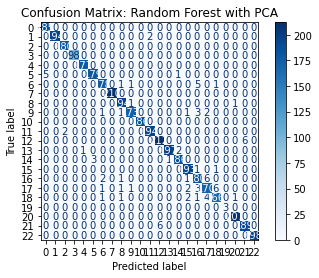

In [133]:
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest with PCA")
plt.show()

## GNBG classification - based on modality 

In [148]:
df_train = gnbr_data_df 
df_train = df_train[~df_train.isin([np.inf, -np.inf]).any(axis=1)]
df_train = df_train.dropna()
X = df_train[selected_features_2] 

def encode_function(func):
    if 'F1' <= func <= 'F6':  # Unimodal functions
        return 1
    elif 'F7' <= func <= 'F15':  # Multimodal with single component
        return 2
    elif 'F16' <= func <= 'F24':  # Multimodal with multiple competing components
        return 3
    else:
        return None  # For undefined functions, if any

df_train['Cluster'] = df_train['Function'].apply(encode_function)

y = df_train['Cluster']


In [152]:
def encode_function(func):
    # Extract the numeric part of the string (F1 to F24)
    num = int(func[1:])  # This slices the string and converts the number
    
    if 1 <= num <= 6:  # Unimodal functions
        return 1
    elif 7 <= num <= 15:  # Multimodal with single component
        return 2
    elif 16 <= num <= 24:  # Multimodal with multiple competing components
        return 3
    else:
        return None  # For undefined functions, if any

# Apply the encoding function
df_train['Cluster'] = df_train['Function'].apply(encode_function)
y = df_train['Cluster']


In [153]:
y.value_counts()

3    8640
2    7210
1    4810
Name: Cluster, dtype: int64

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9774927395934172


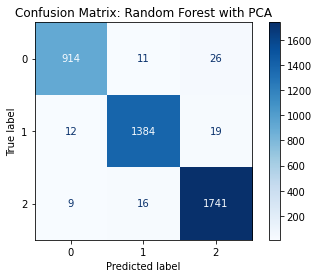

In [155]:
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest with PCA")
plt.show()